In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams
import time
rcParams['figure.figsize'] = 15, 6

In [2]:
#data = wb.DataReader('PETR4.SA', data_source='yahoo', start='2000-1-1')

In [3]:
#sheet = pd.read_excel('EMPRESAS_B3_09-07-21.xlsx', sheet_name='Página1')

In [4]:
sheet = pd.read_excel('LISTA_EMPRESAS_SELECIONADAS.xlsx', sheet_name='Planilha1')

In [5]:
list_df = []
list_error = []

In [6]:
tikers = sheet['Ticker']
len(tikers)

133

#### Coletando os dados na api

In [7]:
for tik in tikers:
    try:
        list_df.append(wb.get_data_yahoo(str(tik), start='2000-1-1', end='2021-10-31' , interval="m"))
        list_df[len(list_df)-1]['Ticker'] = tik
        if len(list_df[-1]) < 36:
            list_df.pop(-1)
        elif list_df[-1]['Volume'][-36:len(list_df[-1])-1].mean() < 20_000_000.00:
            list_df.pop(-1)
    except:
        list_error.append(tik)
        pass

In [8]:
#removendo valores zerados e ausentes
for i in range(0, len(list_df)):
    try:
        list_df[i].replace(0, np.nan, inplace=True)
        list_df[i] = list_df[i].dropna()
        list_df[i] = list_df[i].fillna(method='ffill')
    except:
        pass

In [9]:
#adicionando coluna de Var percentual
for i in range(0, len(list_df)):
    list_df[i]['Var'] = ((list_df[i].loc[:, 'Close']/list_df[i].loc[:, 'Open']) - 1.0) * 100.0

In [10]:
#adicionando coluna de media
#for i in range(0, len(list_df)):
#    list_df[i]['Avg'] = ((list_df[i].loc[:, 'High']+list_df[i].loc[:, 'Low']) / 2.0)

In [10]:
def define_category(num_perc: list):
    """
    Função que cria categorias de variação percentual, indo de valores negativos a positivos, passando por zero,
    que seria o estado onde não houve alterações no preço da ação no período analisado.
    """
    array = []
    for i in num_perc:
        if i == 0:
            array.append(0)
        elif i > 0 and i <= 2:
            array.append(2)
        elif i > 2 and i <= 4:
            array.append(4)
        elif i > 4 and i <= 6:
            array.append(6)
        elif i > 6 and i <= 8:
            array.append(8)
        elif i > 8:
            array.append(10)
        elif i < 0 and i >= -2:
            array.append(-2)
        elif i < -2 and i >= -4:
            array.append(-4)
        elif i < -4 and i >= -6:
            array.append(-6)
        elif i < 6 and i >= -8:
            array.append(-8)
        elif i < -8:
            array.append(-10)
    return array

In [11]:
len((list_df[1].loc[:, 'Var'].values))

166

In [12]:
temp = define_category(list_df[1].loc[:, 'Var'].values)
len(temp)

166

In [13]:
#definicao de pesos
for i in range(0, len(list_df)):
    list_df[i]['Category'] = define_category(list_df[i].loc[:, 'Var'].values)

In [14]:
#ordenando indices
for i in range(0, len(list_df)):
    list_df[i].sort_index()

In [15]:
df_concat = pd.DataFrame()
df_concat = list_df[0]

In [16]:
#exportando excel
for i in range(1, len(list_df)):
    df_concat = pd.concat([df_concat, list_df[i]])
df_concat.to_excel('dados_var_b3_22-11-21.xlsx')

### Importando dados do excel

In [2]:
dfExcel = pd.read_excel('dados_b3.xlsx', index_col='Date', parse_dates=['Date'])

In [3]:
df1 = dfExcel['Ticker'].unique()
df1[0]

'ABEV3.SA'

In [4]:
teste = dfExcel[(dfExcel['Ticker'] == df1[1])]
teste

,High,Low,Open,Close,Volume,Adj Close,Ticker,Avg,Var,Bin_var,Unnamed: 11,Unnamed: 12
Date,,,,,,,,,,,,
2008-02-01,3.486100,3.035311,3.450037,3.149511,13296685,2.240382,ALPA4.SA,3.260705,-8.710802,-1,NaN,NaN
2008-03-01,3.365890,2.976108,3.149511,3.215326,8332053,2.287200,ALPA4.SA,3.170999,2.089689,1,NaN,NaN
2008-04-01,3.275732,2.886551,3.275732,3.035311,6139231,2.159148,ALPA4.SA,3.081141,-7.339460,-1,NaN,NaN
2008-05-01,3.816679,3.035311,3.035311,3.771600,4455518,2.682901,ALPA4.SA,3.425995,24.257449,1,NaN,NaN
2008-06-01,3.786626,2.945154,3.786626,3.005259,3560418,2.137770,ALPA4.SA,3.365890,-20.634915,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,51.490002,46.369999,47.290001,50.189999,32037100,50.189999,ALPA4.SA,48.930000,6.132370,1,NaN,NaN
2021-07-01,53.970001,49.349998,51.419998,51.459999,35701000,51.459999,ALPA4.SA,51.660000,0.077793,1,NaN,NaN
2021-08-01,62.330002,52.299999,52.299999,59.970001,58686000,59.970001,ALPA4.SA,57.315001,14.665396,1,NaN,NaN


### Etapas do processo
##### 1 - Função para devolver a serie com média móvel, função tem como parâmetro a serie e a janela 
##### 2 - Função para testar e transformar serie em estacionária, devolve uma ts estacionária
##### 3 - Aqui o bicho pega - identificar sazonalidade e tendência, qualificar isso
##### 4 - A partir dos dados qualificados, fazer previsão e testar sim ou não, parâmetro bool

In [17]:
def generete_ts_moving_avarege(ts : pd.Series, window : int):
    """Retorna uma serie temporal de média móvel com valores ausentes removidos"""
    ts = ts.rolling(window=window).mean()
    ts.dropna(inplace=True)
    return ts

In [18]:
def test_and_transform_stationary_ts(ts : pd.Series):
    """Recebe uma série temporal, testa e se preciso transforma e devolve uma serie estacionária. Retorna None em caso de falha"""
    adfuller_ts = adfuller(ts, autolag='AIC')
    if adfuller_ts[1] < 0.05:
        return ts
    else:
        ts_log1 = np.log(ts)
        adfuller_ts_log1 = adfuller(ts_log1, autolag='AIC')
        if adfuller_ts_log1[1] < 0.05:
            return ts_log1
        else:
            ts_log2 = np.log(ts_log1)
            adfuller_ts_log2 = adfuller(ts_log2, autolag='AIC')
            if adfuller_ts_log2[1] < 0.05:
                return ts_log2
            else:
                ts_log3 = np.log(ts_log2)
                adfuller_ts_log3 = adfuller(ts_log3, autolag='AIC')
                if adfuller_ts_log3[1] < 0.05:
                    return ts_log3
                else:
                    return

In [19]:
def components_seasonal_trend_resid_STL(ts : pd.Series):
    """
    Retorna uma tupla com os componentes isolados, sazonalidade, tendencia e residuo.
    Metodo STL.
    """
    ts = ts.set_index(['Date'])
    ts = ts.fillna(method='ffill')
    ts = ts.asfreq('MS')
    result = STL(ts, robust=True, period=12).fit()
    return (result.seasonal, result.trend, result.resid)

In [20]:
def components_seasonal_trend_resid_classic(ts : pd.Series, freq : int):
    """
    Retorna uma tupla com os componentes isolados, sazonalidade, tendencia e residuo.
    Metodo classico.
    """
    ts.sort_index(inplace=True)
    result = seasonal_decompose(ts, freq=freq, model='aditive')
    return (result.seasonal, result.trend, result.resid)

In [21]:
def seasonality_trend_rate(ts : tuple):
    """
    Recebe uma tupla com listas com os valores isolados de sazonalidade, tendencia e residuo, 
    e retorna um dict com a media da avaliação da força destes.
    """
    max_seazonal = (0.1 - (ts[2]/(ts[0] + ts[2])))
    max_seazonal.mean()
    max_trend = (0.1 - (ts[2]/(ts[1] + ts[2])))
    max_trend.mean()
    return {'max_seazonal': max_seazonal.mean(),
            'max_trend': max_trend.mean()}


In [22]:
def separate_analisys_test(ts: pd.Series, period_test: int):
    """
    Separa a série temporal em 2 grupos, o primeiro com os dados a serem analisados para identificação dos padrões,
    o segundo grupo deverá ter os últimos 12 meses para validação dos padrões identificados.
    """
    ts_analisys = ts[:len(ts) - (period_test + 1)]
    ts_test = ts[len(ts) - period_test:]
    return ts_analisys, ts_test

In [27]:
import datetime

In [26]:
a = '2021-01'
d = datetime.datetime.strptime(a, "%Y-%m")
print(d.month)

1


In [142]:
def find_paterns(ts: pd.Series, period: int):
    """
    Identifica os padrões sazonais.
    """
    remainder = len(ts) % period
    ts = ts[remainder:]
    #cicles = len(ts) / period
    period_n = []
    vlr_n = []
    weight_n = []
    
    for i in range(0, period):#iniciando arrays de zeros
        vlr_n.append([])
        period_n.append(0)
        weight_n.append(0)
            
    for i in range(0, len(ts)):
        month = pd.to_datetime(ts.index[i], '%Y-%m-%d %H:%M:%S')
        for count in range(0, period):
            #month = pd.to_datetime(ts.index[count], '%Y-%m-%d %H:%M:%S')
            #print('month.month -> ', month.month, 'count+1 -> ', count+1)
            if month.month == count+1:
                #print('ok if 1')
                period_n[count] = count+1
                vlr_n[count].append(ts.values[i])
                #print('period_n[count] -> ', period_n[count], 'vlr_n[count] -> ', vlr_n[count]  )
                if len(vlr_n[count]) > 1:
                    #print('if 2 ok')
                    if ((ts.values[i] != 0.0 and ts.values[i] >= 6.0) 
                        and (ts.values[i] - vlr_n[count][len(vlr_n[count])-1] <= 1.0
                        or ts.values[i] - vlr_n[count][len(vlr_n[count])-1] >= -1.0)):
                        print('ts.values[i] -> ', ts.values[i], 'i -> ', i, 'vlr_n[count][len(vlr_n[count])-1] -> ', 
                              vlr_n[count][len(vlr_n[count])-1])
                        #print('if 2.1 ok')
                        weight_n[count] = weight_n[count] + 3
                    elif ((ts.values[i] != 0.0 and ts.values[i] <= -6.0) 
                          and (ts.values[i] - vlr_n[count][len(vlr_n[count])-1] <= 1.0
                          or ts.values[i] - vlr_n[count][len(vlr_n[count])-1] >= -1.0)):
                        print('ts.values[i] -> ', ts.values[i], 'i -> ', i, 'vlr_n[count][len(vlr_n[count])-1] -> ', 
                              vlr_n[count][len(vlr_n[count])-1])
                        #print('if 2.1 ok')
                        weight_n[count] = weight_n[count] + 3    
                        
                    elif ((ts.values[i] != 0.0 and ts.values[i] >= 4.0)  
                          and (ts.values[i] - vlr_n[count][len(vlr_n[count])-1] <= 2.0
                          or ts.values[i] - vlr_n[count][len(vlr_n[count])-1] >= -2.0)):
                        print('if 2.2 ok')
                        weight_n[count] = weight_n[count] + 2
                    elif ((ts.values[i] != 0.0 and ts.values[i] <= -4.0)  
                          and (ts.values[i] - vlr_n[count][len(vlr_n[count])-1] <= 2.0
                          or ts.values[i] - vlr_n[count][len(vlr_n[count])-1] >= -2.0)):
                        print('if 2.2 ok')
                        weight_n[count] = weight_n[count] + 2
                        
                        
                    elif ((ts.values[i] != 0.0 and ts.values[i] >= 2.0) 
                          and (ts.values[i] - vlr_n[count][len(vlr_n[count])-1] <= 3.0
                          or ts.values[i] - vlr_n[count][len(vlr_n[count])-1] >= -3.0)):
                        print('if 2.3 ok')
                        weight_n[count] = weight_n[count] - 2
                    elif ((ts.values[i] != 0.0 and ts.values[i] <= -2.0) 
                          and (ts.values[i] - vlr_n[count][len(vlr_n[count])-1] <= 3.0
                          or ts.values[i] - vlr_n[count][len(vlr_n[count])-1] >= -3.0)):
                        print('if 2.3 ok')
                        weight_n[count] = weight_n[count] - 2
                        
                    else:
                        print('if 2.4 ok')
                        weight_n[count] = weight_n[count] - 4
                else:
                    print('if 3 ok')
                    weight_n[count] = 0
    return period_n, vlr_n, weight_n

In [29]:
timestamp = pd.to_datetime(list_df[0]['Var'].index)
timestamp[0].month

2

In [30]:
month = datetime.datetime.strptime(str(timestamp[1]), '%Y-%m-%d %H:%M:%S')
month.month

3

In [151]:
period_n, vlr_n, weight_n = find_paterns(list_df[90]['Var'], 12)

if 3 ok
if 3 ok
if 3 ok
if 3 ok
if 3 ok
if 3 ok
if 3 ok
if 3 ok
if 3 ok
if 3 ok
if 3 ok
if 3 ok
if 2.4 ok
if 2.2 ok
ts.values[i] ->  15.555557096847373 i ->  14 vlr_n[count][len(vlr_n[count])-1] ->  15.555557096847373
if 2.4 ok
ts.values[i] ->  -6.810897269349292 i ->  16 vlr_n[count][len(vlr_n[count])-1] ->  -6.810897269349292
if 2.3 ok
ts.values[i] ->  -10.169491525423723 i ->  18 vlr_n[count][len(vlr_n[count])-1] ->  -10.169491525423723
ts.values[i] ->  -15.63981042654028 i ->  19 vlr_n[count][len(vlr_n[count])-1] ->  -15.63981042654028
ts.values[i] ->  7.309489087346566 i ->  20 vlr_n[count][len(vlr_n[count])-1] ->  7.309489087346566
ts.values[i] ->  -16.666666666666664 i ->  21 vlr_n[count][len(vlr_n[count])-1] ->  -16.666666666666664
ts.values[i] ->  8.150825323387956 i ->  22 vlr_n[count][len(vlr_n[count])-1] ->  8.150825323387956
if 2.4 ok
ts.values[i] ->  7.9754551932226025 i ->  24 vlr_n[count][len(vlr_n[count])-1] ->  7.9754551932226025
if 2.4 ok
ts.values[i] ->  -9.10645863

In [152]:
weight_n

[29, 30, 10, 43, 25, 21, 11, 1, 21, 32, 17, 30]

In [153]:
period_n

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [150]:
list_df[90].head()

,High,Low,Open,Close,Volume,Adj Close,Ticker,Var,Category
Date,,,,,,,,,
2000-02-01,5.050781,4.101562,4.101562,5.027343,7.889408e+10,3.695633,PETR3.SA,22.571420,10
2000-03-01,5.367187,4.933593,5.068477,5.156250,5.108480e+10,3.790393,PETR3.SA,1.731740,2
2000-04-01,5.214726,4.347656,5.085937,4.687500,5.249152e+10,3.445812,PETR3.SA,-7.834093,-8
2000-05-01,4.746093,4.148320,4.722656,4.746093,5.819136e+10,3.488884,PETR3.SA,0.496268,2
2000-06-01,6.625000,4.921993,4.921993,6.625000,5.667405e+10,4.870080,PETR3.SA,34.599954,10


In [51]:
df_test = pd.DataFrame(teste1)

In [52]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,0,0,0,0,0
1,[],[],[],[],[],[],[],[],[],[],[],[]
2,0,0,0,0,0,0,0,0,0,0,0,0


In [122]:
#def generete_avg_high_low_colunm(df : pd.DataFrame):
#    for i in range(0, len(df)):
#        df['Avg'] = ((df[i].loc[:, 'High']+df[i].loc[:, 'Low']) / 2.0)
#    return df

In [22]:
def select_tickers_seazonals(df : pd.DataFrame):
    """
    Função responsável por selecionar os melhores ativos, a partir de critérios de
    força na sazonalidade e na tendência.
    """
    df_unique = df['Ticker'].unique()
    df_return = pd.DataFrame()
    list_rate = []
    list_tickers = []
    for i in df_unique:
        print(i)
        df_i = df[(df['Ticker'] == i)]
        #df_i = generete_avg_high_low_colunm(df_i)
        ts = generete_ts_moving_avarege(df_i['Avg'], 12)
        ts = transform_stationary_ts(ts)
        print(ts)
        if ts is not None:
            print(i)
            #components = components_seasonal_trend_resid_STL(ts)
            components = components_seasonal_trend_resid_classic(ts, 12)
            rate = seasonality_trend_rate(components)
            list_tickers.append(i)
            list_rate.append(rate)
        df_return['Ticker'] = list_tickers
        df_return['Rate'] = list_rate
    return df_return

In [23]:
def binary_variation(df : pd.DataFrame):
    """
    Recebe um data frame e devolve um data frame com uma coluna a mais 'bin_var', onde '0' indica não 
    variação do preço da ação, '1' variação positiva ou alta e '-1', variação negativa ou baixa.
    """
    df['bin_var'] = (((df.loc[:, 'Close']/df.loc[:, 'Open']) - 1.0) * 100.0)

In [15]:
components = components_seasonal_trend_resid_classic(teste['Avg'], 12)

C:\Users\DAGOBE~1\AppData\Local\Temp/ipykernel_2240/3024066247.py:7: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(ts, freq=freq, model='aditive')


In [24]:
components[1].describe().round(2)

count    153.00
mean      11.54
std        9.43
min        1.80
25%        6.62
50%        8.77
75%       11.95
max       44.66
Name: trend, dtype: float64

In [155]:
df_new = select_tickers_seazonals(dfExcel)

ABEV3.SA


C:\Users\Dagoberto Medeiros\anaconda3\envs\TCC\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


MissingDataError: exog contains inf or nans

In [24]:
def adf_test(y):
  print('Resultado do teste de Dick-Fuller:')
  dftest = adfuller(y, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Teste', 'Valor P', '# de lags', '# de observações'])
  for key, value in dftest[4].items():
    dfoutput['Valor crítico({})'.format(key)] = value
  print(dfoutput)

In [163]:
list_df[111].head()

,High,Low,Open,Close,Volume,Adj Close,Ticker,Var,Category
Date,,,,,,,,,
2017-11-01,21.320000,17.100000,20.010000,17.510000,46209900.0,16.879461,SUZB3.SA,-12.493753,-10
2017-12-01,19.280001,17.030001,17.299999,18.690001,52593100.0,18.200478,SUZB3.SA,8.034690,10
2018-01-01,21.799999,18.410000,18.690001,20.660000,71058300.0,20.118879,SUZB3.SA,10.540392,10
2018-02-01,23.469999,19.299999,20.680000,21.750000,75160600.0,21.180330,SUZB3.SA,5.174080,6
2018-03-01,34.759998,21.250000,21.959999,33.360001,182777100.0,32.486248,SUZB3.SA,51.912577,10


In [194]:
adf_test(list_df[111]['Close'])

Resultado do teste de Dick-Fuller:
Teste                 -2.161626
Valor P                0.220467
# de lags              0.000000
# de observações      49.000000
Valor crítico(1%)     -3.571472
Valor crítico(5%)     -2.922629
Valor crítico(10%)    -2.599336
dtype: float64


In [195]:
y = test_and_transform_stationary_ts(list_df[111]['Close'])

In [196]:
adf_test(y)

Resultado do teste de Dick-Fuller:
Teste                 -2.892851
Valor P                0.046186
# de lags              0.000000
# de observações      49.000000
Valor crítico(1%)     -3.571472
Valor crítico(5%)     -2.922629
Valor crítico(10%)    -2.599336
dtype: float64


In [108]:
adf_test(list_df[73]['Var'])

Resultado do teste de Dick-Fuller:
Teste                -1.636407e+01
Valor P               2.852005e-29
# de lags             0.000000e+00
# de observações      2.580000e+02
Valor crítico(1%)    -3.455953e+00
Valor crítico(5%)    -2.872809e+00
Valor crítico(10%)   -2.572775e+00
dtype: float64


In [236]:
y = list_df[111]['Category']

In [239]:
y.values

array([-10,  10,  10,   6,  10,  10,   6,   4,  -2,   6,  -2, -10,  10,
       -10,  10,   4,  -4, -10, -10,   2,  -8,  -6,  10,  -4,  10,   4,
        -2,  -4,  -8,  10,  -4,  -4,  10,  10, -10,  10,  10,   6,   6,
        10,  -8,  -2, -10,  -2, -10,  10, -10, -10,   4,   4], dtype=int64)

In [31]:
rolmean = y.rolling(window=12).mean()
rolstd = y.rolling(window=12).std()

C:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


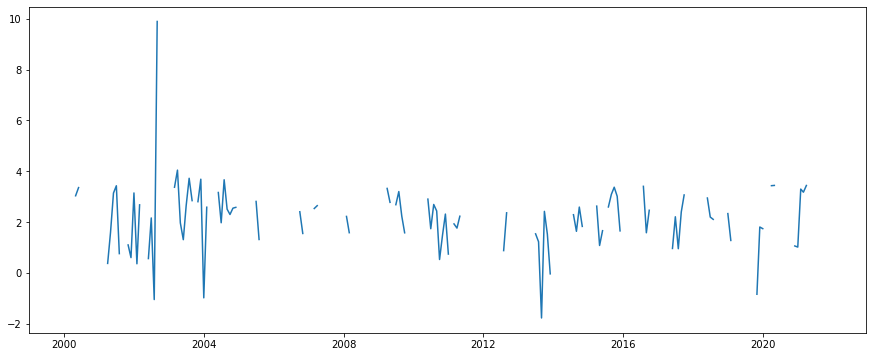

In [32]:
indexedDataSet_logScale = np.log(y)
plt.plot(indexedDataSet_logScale)

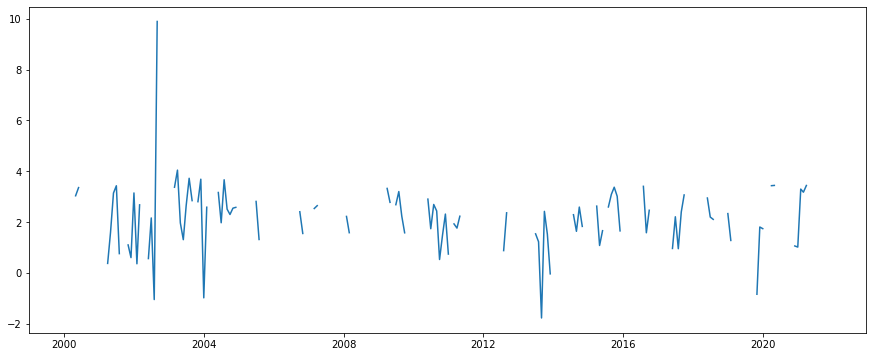

In [33]:
movingAverage = indexedDataSet_logScale.rolling(window=12).mean()
movingStd = indexedDataSet_logScale.rolling(window=12).std()
plt.plot(indexedDataSet_logScale)
plt.plot(movingAverage, color='red')

In [35]:
datasetLogScaleMinusMovingAverage = indexedDataSet_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head()

Date
2000-02-01   NaN
2000-03-01   NaN
2000-04-01   NaN
2000-05-01   NaN
2000-06-01   NaN
Name: Var, dtype: float64

In [36]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True) #remover os valores ausentes
datasetLogScaleMinusMovingAverage.head()

Series([], Name: Var, dtype: float64)

In [37]:
adf_test(datasetLogScaleMinusMovingAverage)

Resultado do teste de Dick-Fuller:


ValueError: sample size is too short to use selected regression component

In [85]:
#list_df[0].head(2).round(2).sort_values(ascending=True, by='High' )

<ipython-input-110-ef8adff48f83>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(y, freq=12, model='aditive')


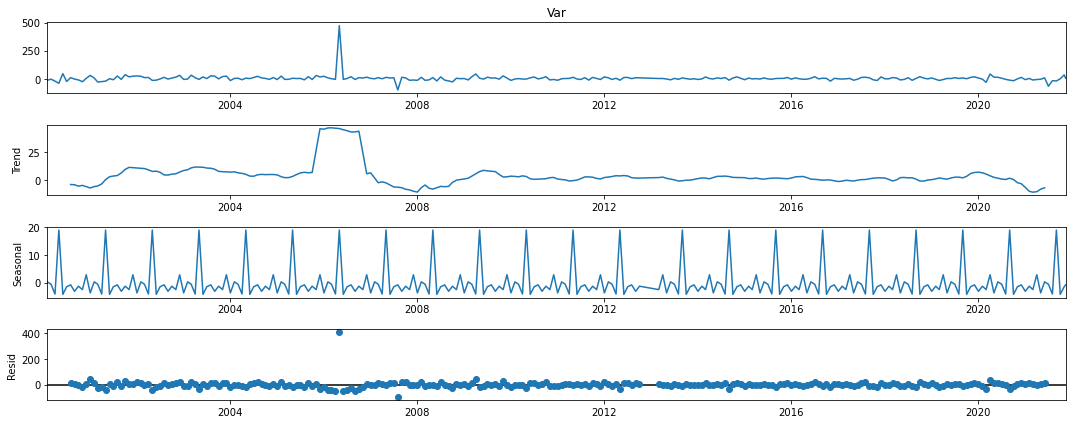

In [110]:
result = seasonal_decompose(y, freq=12, model='aditive')
result.plot()
plt.show()

In [111]:
max_seazonal_cls = (0.1 - (result.resid/(result.seasonal + result.resid)))
max_seazonal_cls.mean()

-0.5434628781285554

In [112]:
max_trend_cls = (0.1 - (result.resid/(result.trend + result.resid)))
max_trend_cls.mean()

0.23704341028251555

In [209]:
dfSTL = y

In [210]:
dfSTL = pd.DataFrame(dfSTL)
dfSTL.head()

,Category
Date,
2017-11-01,-10
2017-12-01,10
2018-01-01,10
2018-02-01,6
2018-03-01,10


In [211]:
dfSTL.asfreq('MS')

,Category
Date,
2017-11-01,-10
2017-12-01,10
2018-01-01,10
2018-02-01,6
2018-03-01,10
2018-04-01,10
2018-05-01,6
2018-06-01,4
2018-07-01,-2


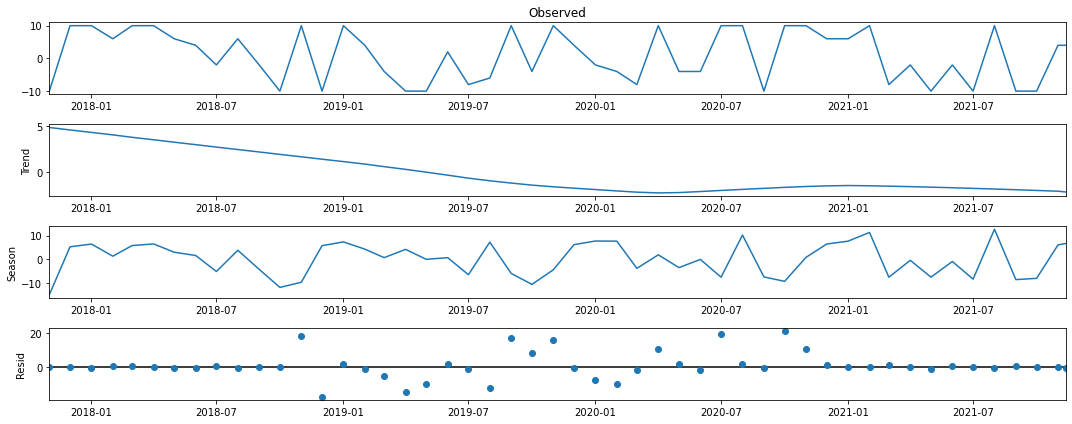

In [212]:
resultSTL = STL(dfSTL, robust=True, period=12).fit()
resultSTL.plot()
plt.show()

In [119]:
max_trend = (0.1 - (resultSTL.resid/(resultSTL.trend + resultSTL.resid)))
max_trend.mean()

-1.0918541745515205

In [118]:
max_seazonal = (0.1 - (resultSTL.resid/(resultSTL.seasonal + resultSTL.resid)))
max_seazonal.mean()

-0.1761060922530939

In [93]:
resultSTL.trend.to_excel('resultSTL.xlsx', sheet_name='trend')

In [94]:
resultSTL.resid.to_excel('resultSTL.xlsx', sheet_name='resid')

In [95]:
resultSTL.observed.to_excel('resultSTL.xlsx', sheet_name='observed')

In [96]:
resultSTL.seasonal.to_excel('resultSTL.xlsx', sheet_name='seasonal')

In [97]:
result.seasonal.to_excel('resultClassic.xlsx')

In [128]:
from pmdarima.arima import auto_arima

In [213]:
y = dfSTL

In [214]:
stepwise_model = auto_arima(y, start_p=1, start_q=1, max_p=6, max_q=6, m=12, start_P=0, d=1, D=1, trace=True, 
                            error_action='ignore', suppress_warnings=True, stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=314.753, Time=0.02 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=305.024, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=305.141, Time=0.12 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=296.216, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=inf, Time=0.35 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=287.596, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.39 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=288.280

In [215]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   50
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                -140.798
Date:                             Tue, 16 Nov 2021   AIC                            287.596
Time:                                     23:41:35   BIC                            292.429
Sample:                                          0   HQIC                           289.300
                                              - 50                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8892      0.163     -5.460      0.000      -1.208      -0.570
ar.S.L12      -0.5759      0.141     -4.099      0.000      -0.851      -0.301
sigma2        98.7797     27.323      3.615      0.000      45.228     152.331
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.79   Prob(JB):                         0.84
Heteroskedasticity (H):               0.39   Skew:                             0.14
Prob(H) (two-sided):                  0.12   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [172]:
testAA.head()

Date
2021-01-01   -10
2021-02-01     4
2021-03-01   -10
2021-04-01    -8
2021-05-01    -6
Name: Category, dtype: int64

In [216]:
train = separate_analisys_test(y, 12)[0]
testAA = separate_analisys_test(y, 12)[1]

In [217]:
stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [218]:
feature_forecast = stepwise_model.predict(n_periods=12)

In [219]:
feature_forecast = pd.DataFrame(feature_forecast, index=testAA.index, columns=['Category'])

<AxesSubplot:xlabel='Date'>

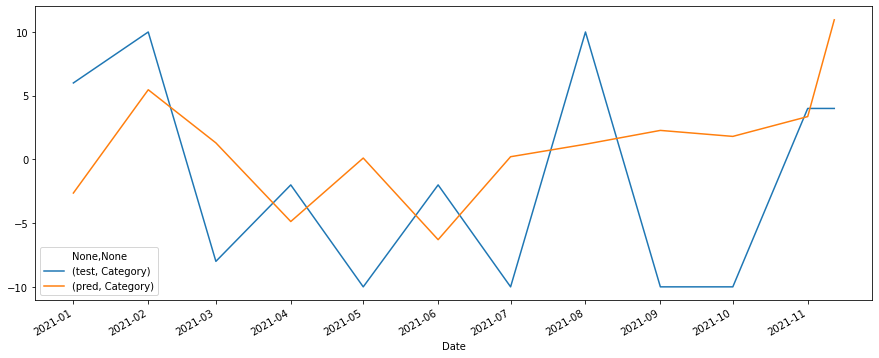

In [220]:
pd.concat({'test': testAA, 'pred': feature_forecast}, axis=1).plot()

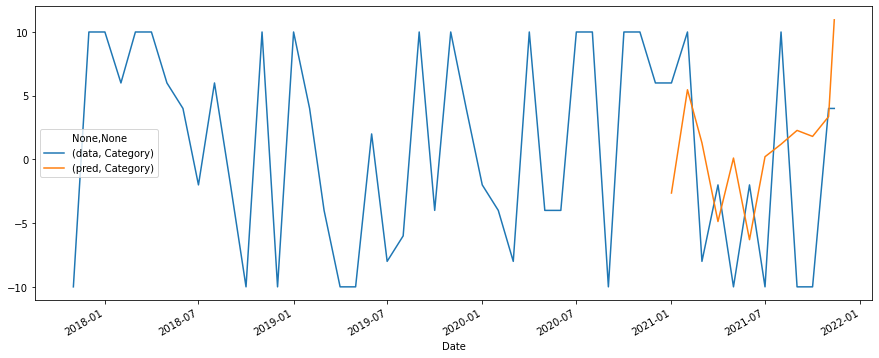

In [221]:
pd.concat({'data': y, 'pred': feature_forecast}, axis=1).plot()
plt.show()